In [4]:
# -*- coding: utf-8 -*-
import scipy.integrate as spi
import numpy as np
import pylab as pl

# Modèles compartimentaux en épidémiologie 

Les modèles mathématiques de maladies infectieuses, d'abord outils purement théoriques, ont commencé à être mis en pratique avec le problème du SIDA dans les années 1980. La course d'une épidémie dans une population dépendant de paramètres extrêmement nombreux (stades cliniques possibles, déplacement des individus, souches de la maladie), les modèles mathématiques se sont progressivement affirmés comme outils d'aide à la décision pour les politiques publiquesC 1. En effet, les modèles permettent de prévoir les conséquences pour la population d'actions aussi variées que la vaccination, la mise en quarantaine ou la distribution de tests de dépistage. Une approche fondatrice dans les années 1920 fut celle des modèles compartimentaux, qui divisent la population en classes épidémiologiques telles que les individus susceptibles d'être infectés, ceux qui sont infectieux, et ceux qui ont acquis une immunité à la suite de la guérison. Depuis, cette approche fut utilisée pour modéliser de très nombreuses maladies, et continue d'être un sujet de recherche actif en prenant en compte de nouveaux éléments tels que les découvertes de la science des réseaux. https://fr.wikipedia.org/wiki/Mod%C3%A8les_compartimentaux_en_%C3%A9pid%C3%A9miologie

Nous traitons la publication comme un virus et les personnes comme des personnes susceptibles.Au cours de la discussion qui suit, nous discuterons de la situation du rétablissement.


Hypothèse:Tous ceux qui ont vu cette publication diffuseront cette publicité.

Les paramètres qui sont utilisés dans le modele

In [5]:
p_0=1.356
"""La probabilité qu'une publication se transmette d'une personne qui a déjà vu à un individu non vu par unité de temps est p_0"""
p_1=0
#p_1 est La probabilité les gens qui a déjà vu va arreter diffuer cette publication.
I0=1e-6
#I0 est la partie initiale de les personnes qui a vu ce publication
ND=80
#ND est tous les temps
TS=1.0
INPUT = (1.0-I0, I0)

on écrit une fonction diff_pub pour obtient les gens qui ont vu ou pas.

In [6]:
def diff_pub(INP,t):
    Y=np.zeros((2)) 
    V = INP
    Y[0] = - p_0 * V[0] * V[1] + p_1 * V[1]
    Y[1] = p_0 * V[0] * V[1] - p_1 * V[1]
    return Y


on calcule les nombres du monde à chaque moment. 

In [7]:
 t_start = 0.0; t_end = ND; t_inc = TS
 t_range = np.arange(t_start, t_end+t_inc, t_inc)
 RES = spi.odeint(diff_pub,INPUT,t_range)
 """RES est le résultat de scores individuels qui a déjà vu et non vu pour chaque pas de temps"""
 print(RES)

[[9.99999000e-01 1.00000000e-06]
 [9.99998569e-01 1.43131806e-06]
 [9.99997956e-01 2.04419500e-06]
 [9.99997071e-01 2.92898970e-06]
 [9.99995821e-01 4.17944999e-06]
 [9.99994029e-01 5.97131929e-06]
 [9.99991470e-01 8.53042579e-06]
 [9.99987815e-01 1.21853338e-05]
 [9.99982600e-01 1.73995987e-05]
 [9.99975150e-01 2.48503152e-05]
 [9.99964516e-01 3.54844426e-05]
 [9.99949327e-01 5.06729012e-05]
 [9.99927647e-01 7.23531338e-05]
 [9.99896697e-01 1.03302600e-04]
 [9.99852512e-01 1.47487558e-04]
 [9.99789437e-01 2.10562537e-04]
 [9.99699410e-01 3.00589600e-04]
 [9.99570937e-01 4.29063182e-04]
 [9.99387566e-01 6.12434466e-04]
 [9.99125901e-01 8.74098731e-04]
 [9.98752598e-01 1.24740249e-03]
 [9.98220145e-01 1.77985495e-03]
 [9.97460988e-01 2.53901164e-03]
 [9.96379205e-01 3.62079504e-03]
 [9.94838902e-01 5.16109784e-03]
 [9.92648189e-01 7.35181099e-03]
 [9.89537383e-01 1.04626174e-02]
 [9.85130004e-01 1.48699961e-02]
 [9.78905603e-01 2.10943967e-02]
 [9.70154695e-01 2.98453046e-02]
 [9.579295

on exprime les valeur précédents en terms des graphies

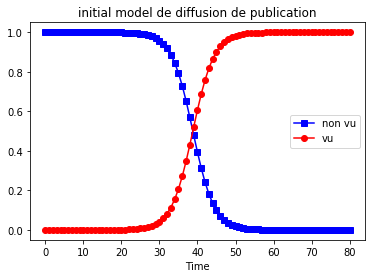

In [8]:
#Ploting
pl.plot(RES[:,0], '-bs', label='non vu')
pl.plot(RES[:,1], '-ro', label='vu')
pl.legend(loc=0)
pl.title('initial model de diffusion de publication')
pl.xlabel('Time')
pl.ylabel('')
pl.savefig('Premiere modele.png', dpi=900)
pl.show()

Comme vous pouvez le voir sur la photo, tout le monde a vu cette publication à environ t = 16.

Après,on va discuter le proportion de gens qui ont déjà vu vont arreter diffuser cette publication.
Hypothèse:Après un certain temps, certaines personnes ayant vu cette publicité arrêteront diffuser..

In [9]:
p_0=1.326
p_1=1
I0=1e-6
ND=75
TS=1.0
INPUT = (1.0-I0, I0)

In [10]:
def diff_pub(INP,t):
    Y=np.zeros((2)) 
    V = INP
    Y[0] = - p_0 * V[0] * V[1] + p_1 * V[1]
    Y[1] = p_0 * V[0] * V[1] - p_1 * V[1]
    return Y
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_pub,INPUT,t_range)

print(RES)

[[9.99999000e-01 1.00000000e-06]
 [9.99998611e-01 1.38887545e-06]
 [9.99998080e-01 1.92015674e-06]
 [9.99997323e-01 2.67734724e-06]
 [9.99996293e-01 3.70736459e-06]
 [9.99994864e-01 5.13645537e-06]
 [9.99992879e-01 7.12130678e-06]
 [9.99990123e-01 9.87675046e-06]
 [9.99986315e-01 1.36847428e-05]
 [9.99981036e-01 1.89635067e-05]
 [9.99973720e-01 2.62801439e-05]
 [9.99963584e-01 3.64157976e-05]
 [9.99949538e-01 5.04619633e-05]
 [9.99930082e-01 6.99179972e-05]
 [9.99903133e-01 9.68665253e-05]
 [9.99865803e-01 1.34197222e-04]
 [9.99814105e-01 1.85894506e-04]
 [9.99742508e-01 2.57491709e-04]
 [9.99643416e-01 3.56584044e-04]
 [9.99506254e-01 4.93745650e-04]
 [9.99316478e-01 6.83522044e-04]
 [9.99054040e-01 9.45960243e-04]
 [9.98691397e-01 1.30860278e-03]
 [9.98190750e-01 1.80925036e-03]
 [9.97500519e-01 2.49948111e-03]
 [9.96550690e-01 3.44930958e-03]
 [9.95246969e-01 4.75303128e-03]
 [9.93463779e-01 6.53622077e-03]
 [9.91036473e-01 8.96352659e-03]
 [9.87753898e-01 1.22461024e-02]
 [9.833536

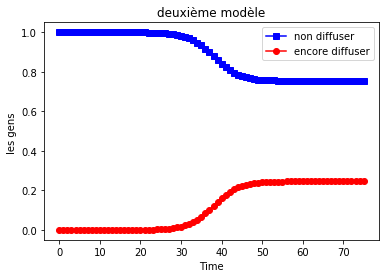

In [11]:
#Ploting
pl.plot(RES[:,0], '-bs', label='non diffuser')
pl.plot(RES[:,1], '-ro', label='encore diffuser')
pl.legend(loc=0)
pl.title('deuxième modèle')
pl.xlabel('Time')
pl.ylabel('les gens ')
pl.savefig('deuxième modèle.png', dpi=900)
pl.show()

Comme on peut le voir sur la figure, à environ t = 17, la personne qui a vu la publication était à peu près égale à celle qui a arreté diffuser la publication, en maintenant un équilibre dynamique.

Après, on va discuter 3 types de personne
1.non vu
2.vu et arreter diffuser
3.encore diffuser

In [12]:
p_0=0.952
p_1=0.3523
TS=1.0
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)

In [13]:
def diff_eqs(INP,t):
    Y=np.zeros((3))
    V = INP
    Y[0] = - p_0 * V[0] * V[1]
    Y[1] = p_0 * V[0] * V[1] - p_1 * V[1]
    Y[2] = p_1 * V[1]
    return Y 
 
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
 
print(RES)

[[9.99999000e-01 1.00000000e-06 0.00000000e+00]
 [9.99997682e-01 1.83030493e-06 4.87772593e-07]
 [9.99995286e-01 3.33981960e-06 1.37455774e-06]
 [9.99990924e-01 6.08711424e-06 2.98850266e-06]
 [9.99982963e-01 1.11024269e-05 5.93486258e-06]
 [9.99968470e-01 2.02317412e-05 1.12981822e-05]
 [9.99942060e-01 3.68681239e-05 2.10720968e-05]
 [9.99893937e-01 6.71811177e-05 3.88821108e-05]
 [9.99806289e-01 1.22388852e-04 7.13222114e-05]
 [9.99646661e-01 2.22927877e-04 1.30410634e-04]
 [9.99356136e-01 4.05886829e-04 2.37976956e-04]
 [9.98827442e-01 7.38752611e-04 4.33804950e-04]
 [9.97866271e-01 1.34364092e-03 7.90088246e-04]
 [9.96121547e-01 2.44075913e-03 1.43769339e-03]
 [9.92963602e-01 4.42364958e-03 2.61274792e-03]
 [9.87277259e-01 7.98467749e-03 4.73806364e-03]
 [9.77132949e-01 1.43068878e-02 8.56016363e-03]
 [9.59331674e-01 2.53042168e-02 1.53641093e-02]
 [9.28976035e-01 4.37608693e-02 2.72630960e-02]
 [8.79640783e-01 7.29020285e-02 4.74571881e-02]
 [8.05333565e-01 1.14548598e-01 8.011783

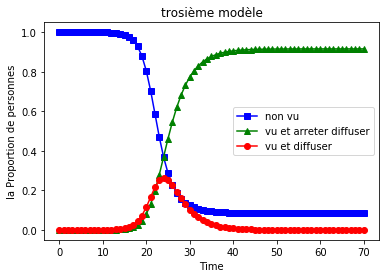

In [89]:
#Ploting
pl.plot(RES[:,0], '-bs', label='non vu')
pl.plot(RES[:,2], '-g^', label='vu et arreter diffuser')
pl.plot(RES[:,1], '-ro', label='vu et diffuser')
pl.legend(loc=0)
pl.title('trosième modèle')
pl.xlabel('Time')
pl.ylabel('la Proportion de personnes')
pl.savefig('trosième modèle.png', dpi=900) 
pl.show()

Comme on peut le voir sur la figure, à la fin, tout le monde a vu des publication et le nombre de personnes qui diffusent des publication a d'abord augmenté, puis diminué, pour finalement devenir des personnes qui ont vu des publication sans se diffuser.